# < 목차 >

#### (ㄱ) 상관관계 시각화 프로젝트
#### (ㄴ) ML 예측모델 구축 프로젝트

# (ㄱ) 상관관계 시각화 프로젝트의 목표: 
교량데이터간의 상관관계를 분석하고 그 결과를 히트맵으로 표현한다

# A. 데이터 전처리

In [1]:
# 데이터 추출 : 엑셀파일에서 데이터 불러오기
import pandas as pd
import numpy as np
import sys

calsdata2 =  pd.read_excel('../dataset/calsdata2.xlsx', sheet_name = [0,1], skiprows = 2)

In [2]:
calsdata2 # shape:(355,82)

{0:         설계사                                프로젝트명    연도  실시설계 승인    교량명   교량형식  \
 0   극동엔지니어링  번재소류지~백호정사간(대로1-13호선)개설공사 실시설계 보완용역  1차년도  2020.05    소초교    거더교   
 1     도담이앤씨      ○○-△△간 지방도4차로 확·포장공사 실시설계 (2공구)  1차년도  2022.02   △△천교    거더교   
 2    동일기술공사             □□고개 위험도로 개량공사 기본 및 실시설계  1차년도  2022.02   BB교량    라멘교   
 3    한국종합기술                  00 ~ 00 국도건설공사 실시설계  1차년도      NaN    평촌교    거더교   
 4    한국종합기술                  00 ~ 00 국도건설공사 실시설계  1차년도      NaN    금서교    거더교   
 ..      ...                                  ...   ...      ...    ...    ...   
 64       유신             다사∼왜관간 광역도로 건설 기본 및 실시설계  2차년도  2020.04   도재천교  합성라멘교   
 65       유신             다사∼왜관간 광역도로 건설 기본 및 실시설계  2차년도  2020.04   하빈천교  합성라멘교   
 66       유신             다사∼왜관간 광역도로 건설 기본 및 실시설계  2차년도  2020.04    세천교    거더교   
 67       유신             다사∼왜관간 광역도로 건설 기본 및 실시설계  2차년도  2020.04  세천고가교    거더교   
 68       유신             다사∼왜관간 광역도로 건설 기본 및 실시설계  2차년도  2020.04    감문교    거더교   
 
        축척 

## a. 컬럼명 가공

In [3]:
# 컬럼명은 영문으로 시작해야하며, 컬럼명에는 영문, 숫자 그리고 '_' 기호만 올 수 있다)

### 1. calsdata_one

In [4]:
# 데이터 길이 및 타입 확인
len(calsdata2) # 2
type(calsdata2) # dict
type(calsdata2[0]) # DataFrame

pandas.core.frame.DataFrame

In [5]:
calsdata_one = pd.DataFrame(calsdata2[0])

In [6]:
# calsdata_one 데이터프레임의 컬럼명을 담은 리스트 선언
calsdata_one_columns = list(calsdata_one.columns)

In [7]:
calsdata_one_columns

['설계사',
 '프로젝트명',
 '연도',
 '실시설계 승인',
 '교량명',
 '교량형식',
 '축척',
 '총경간장',
 '경간개수',
 '1경간',
 '2경간',
 '3경간',
 '4경간',
 '5경간',
 '6경간',
 '7경간',
 '8경간',
 '9경간',
 'S',
 'Unnamed: 19',
 'L [m]',
 'Unnamed: 21',
 'H [m]',
 'Unnamed: 23',
 'K',
 '1교각 기둥높이',
 '2교각 기둥높이',
 '3교각 기둥높이',
 '4교각 기둥높이 ',
 '5교각 기둥높이',
 '6교각 기둥높이',
 '7교각 기둥높이',
 '8교각 기둥높이',
 '축척.1',
 '폭원',
 '차로폭(좌)',
 '차로수(좌)',
 '차로폭(우)',
 '차로수(우)',
 '방호벽(좌)',
 '방호벽(우)',
 '보도폭(좌)',
 '보도폭(우)',
 '보차도경계석(좌)',
 '보차도경계석(우)',
 '길어깨(좌)',
 '길어깨(우)',
 '중앙부',
 '도로포장두께',
 '바닥슬라브두께',
 '거더개수',
 '거더높이',
 '거더간격',
 '거더받침높이',
 '코핑높이(직선+곡선)',
 '코핑높이(직선부)',
 '코핑높이(곡선부)',
 '코핑폭(최대)',
 '코핑폭(최소)',
 '기둥형태',
 '기둥폭',
 '기초폭',
 '기초높이',
 '자전거(좌)',
 '자전거(우)',
 '외측길어깨(좌)',
 '외측길어깨(우)',
 '내측길어깨(좌)',
 '내측길어깨(우)']

In [8]:
# 정규표현식을 이용해 컬럼명에서 특수기호, 공백제거
import re 
 
for i in range(0,len(calsdata_one_columns)):
    calsdata_one_columns[i] = str(calsdata_one_columns[i]) #컬럼명 리스트에 담긴 컬럼명들의 타입을 전부 문자열로 변환 for 정규식
    
    #정규식
    calsdata_one_columns[i] = re.sub(" ","", calsdata_one_columns[i]) # 띄어쓰기 처리
    pattern1 = r'\('    # '('를 '_'로 바꾸는 정규표현식 패턴 정의
    pattern2 = r'[^_\w\s]'    # '_'를 제외한 특수문자를 제거하는 정규표현식 패턴   
    calsdata_one_columns[i] = re.sub(pattern1, '_', calsdata_one_columns[i])    # '('를 '_'로 변경
    calsdata_one_columns[i] = re.sub(pattern2, '', calsdata_one_columns[i])    # '_'를 제외한 특수문자를 공백으로 변경   
    
    #prefix를 활용하여 컬럼명이 숫자로 시작하는 것 방지
    prefix = 'col_'
    calsdata_one_columns[i] = prefix + calsdata_one_columns[i]

In [9]:
calsdata_one_columns    

['col_설계사',
 'col_프로젝트명',
 'col_연도',
 'col_실시설계승인',
 'col_교량명',
 'col_교량형식',
 'col_축척',
 'col_총경간장',
 'col_경간개수',
 'col_1경간',
 'col_2경간',
 'col_3경간',
 'col_4경간',
 'col_5경간',
 'col_6경간',
 'col_7경간',
 'col_8경간',
 'col_9경간',
 'col_S',
 'col_Unnamed19',
 'col_Lm',
 'col_Unnamed21',
 'col_Hm',
 'col_Unnamed23',
 'col_K',
 'col_1교각기둥높이',
 'col_2교각기둥높이',
 'col_3교각기둥높이',
 'col_4교각기둥높이',
 'col_5교각기둥높이',
 'col_6교각기둥높이',
 'col_7교각기둥높이',
 'col_8교각기둥높이',
 'col_축척1',
 'col_폭원',
 'col_차로폭_좌',
 'col_차로수_좌',
 'col_차로폭_우',
 'col_차로수_우',
 'col_방호벽_좌',
 'col_방호벽_우',
 'col_보도폭_좌',
 'col_보도폭_우',
 'col_보차도경계석_좌',
 'col_보차도경계석_우',
 'col_길어깨_좌',
 'col_길어깨_우',
 'col_중앙부',
 'col_도로포장두께',
 'col_바닥슬라브두께',
 'col_거더개수',
 'col_거더높이',
 'col_거더간격',
 'col_거더받침높이',
 'col_코핑높이_직선곡선',
 'col_코핑높이_직선부',
 'col_코핑높이_곡선부',
 'col_코핑폭_최대',
 'col_코핑폭_최소',
 'col_기둥형태',
 'col_기둥폭',
 'col_기초폭',
 'col_기초높이',
 'col_자전거_좌',
 'col_자전거_우',
 'col_외측길어깨_좌',
 'col_외측길어깨_우',
 'col_내측길어깨_좌',
 'col_내측길어깨_우']

In [10]:
# 컬럼명 초기화
calsdata_one.columns = calsdata_one_columns

In [11]:
# 컬럼명 전처리 결과 확인
calsdata_one

,col_설계사,col_프로젝트명,col_연도,col_실시설계승인,col_교량명,col_교량형식,col_축척,col_총경간장,col_경간개수,col_1경간,...,col_기둥형태,col_기둥폭,col_기초폭,col_기초높이,col_자전거_좌,col_자전거_우,col_외측길어깨_좌,col_외측길어깨_우,col_내측길어깨_좌,col_내측길어깨_우
0,극동엔지니어링,번재소류지~백호정사간(대로1-13호선)개설공사 실시설계 보완용역,1차년도,2020.05,소초교,거더교,1:500,48135,1.0,48135.0,...,NaN,NaN,35900,NaN,2000.0,2000.0,1000,1000.0,NaN,NaN
1,도담이앤씨,○○-△△간 지방도4차로 확·포장공사 실시설계 (2공구),1차년도,2022.02,△△천교,거더교,1:400,280860,8.0,35202.0,...,원형,2300,8500,2100,NaN,NaN,2000,2000.0,480.0,500.0
2,동일기술공사,□□고개 위험도로 개량공사 기본 및 실시설계,1차년도,2022.02,BB교량,라멘교,1:300,15500,1.0,15500.0,...,NaN,NaN,11400,1200,NaN,NaN,1500,1500.0,NaN,NaN
3,한국종합기술,00 ~ 00 국도건설공사 실시설계,1차년도,NaN,평촌교,거더교,1:300,50148,1.0,50148.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,한국종합기술,00 ~ 00 국도건설공사 실시설계,1차년도,NaN,금서교,거더교,1:300,60140,2.0,30038.0,...,원형,2200,6700,1500,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64,유신,다사∼왜관간 광역도로 건설 기본 및 실시설계,2차년도,2020.04,도재천교,합성라멘교,1:500,25000,1.0,25000.0,...,NaN,NaN,NaN,1200,NaN,NaN,1500,1500.0,NaN,NaN
65,유신,다사∼왜관간 광역도로 건설 기본 및 실시설계,2차년도,2020.04,하빈천교,합성라멘교,1:500,50000,2.0,25000.0,...,NaN,NaN,NaN,1500,NaN,NaN,1500,1500.0,NaN,NaN
66,유신,다사∼왜관간 광역도로 건설 기본 및 실시설계,2차년도,2020.04,세천교,거더교,1:500,40315,1.0,40315.0,...,NaN,NaN,27900,1600,NaN,NaN,1500,1500.0,NaN,NaN
67,유신,다사∼왜관간 광역도로 건설 기본 및 실시설계,2차년도,2020.04,세천고가교,거더교,1:500,100134,3.0,30110.0,...,원형,NaN,16500,2100,NaN,NaN,1500,1500.0,NaN,NaN


### (2) calsdata_two

In [12]:
# 위와 동일한 작업 반복

In [13]:
calsdata_two = pd.DataFrame(calsdata2[1])

In [14]:
calsdata_two_columns = list(calsdata_two.columns)

In [15]:
for i in range(0,len(calsdata_two_columns)):
    calsdata_two_columns[i] = str(calsdata_two_columns[i])
    
    #정규식
    calsdata_two_columns[i] = re.sub(" ","", calsdata_two_columns[i])
    pattern1 = r'\('    
    pattern2 = r'[^_\w\s]'
    calsdata_two_columns[i] = re.sub(pattern1, '_', calsdata_two_columns[i])   
    calsdata_two_columns[i] = re.sub(pattern2, '', calsdata_two_columns[i])   
    
    #prefix
    prefix = 'col_'
    calsdata_two_columns[i] = prefix + calsdata_two_columns[i]

In [16]:
calsdata_two.columns = calsdata_two_columns

In [17]:
calsdata_two

,col_설계사,col_프로젝트명,col_연도,col_실시설계승인,col_건설준공,col_교량명,col_교량형식,col_축척,col_총경간장,col_경간개수,...,col_기둥형태,col_기둥폭,col_기초폭,col_기초높이,col_자전거_좌,col_자전거_우,col_외측길어깨_좌,col_외측길어깨_우,col_내측길어깨_좌,col_내측길어깨_우
0,NaN,1. 격포-하서 도로확장공사,NaN,NaN,NaN,변산IC교,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1. 격포-하서 도로확장공사,NaN,NaN,NaN,자미교,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,1. 격포-하서 도로확장공사,NaN,NaN,NaN,방포제1교,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,1. 격포-하서 도로확장공사,NaN,NaN,NaN,방포제2교,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,1. 격포-하서 도로확장공사,NaN,NaN,NaN,합구교,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350,NaN,67. 흥해-기계2국도건설공사,NaN,2010.09,NaN,지가2교,라멘교,1:400,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
351,NaN,67. 흥해-기계2국도건설공사,NaN,2010.09,NaN,지가3교,거더교,1:400,35410.0,1.0,...,NaN,NaN,NaN,400.0,NaN,NaN,NaN,NaN,NaN,NaN
352,NaN,67. 흥해-기계2국도건설공사,NaN,2010.09,NaN,지가4교,라멘교,1:400,15000.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
353,NaN,67. 흥해-기계2국도건설공사,NaN,2010.09,NaN,현내천교,라멘교,1:400,27000.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## b. 데이터병합 및 중복제거

In [18]:
# pd.concat()
calsdata_final = pd.concat([calsdata_one, calsdata_two], axis=0, ignore_index=True)

In [19]:
calsdata_final = pd.DataFrame(calsdata_final)

In [20]:
calsdata_final.info() #424, 85

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   col_설계사        69 non-null     object 
 1   col_프로젝트명      424 non-null    object 
 2   col_연도         69 non-null     object 
 3   col_실시설계승인     214 non-null    float64
 4   col_교량명        412 non-null    object 
 5   col_교량형식       337 non-null    object 
 6   col_축척         323 non-null    object 
 7   col_총경간장       326 non-null    float64
 8   col_경간개수       318 non-null    float64
 9   col_1경간        310 non-null    float64
 10  col_2경간        128 non-null    float64
 11  col_3경간        94 non-null     float64
 12  col_4경간        63 non-null     float64
 13  col_5경간        49 non-null     float64
 14  col_6경간        34 non-null     float64
 15  col_7경간        21 non-null     float64
 16  col_8경간        13 non-null     float64
 17  col_9경간        10 non-null     float64
 18  col_S     

In [21]:
# 중복데이터 제거 
calsdata_final.drop_duplicates()

,col_설계사,col_프로젝트명,col_연도,col_실시설계승인,col_교량명,col_교량형식,col_축척,col_총경간장,col_경간개수,col_1경간,...,col_15경간,col_16경간,col_Unnamed27,col_Unnamed29,col_Unnamed31,col_9교각기둥높이,col_10교각기둥높이,col_11교각기둥높이,col_12교각기둥높이,col_13교각기둥높이
0,극동엔지니어링,번재소류지~백호정사간(대로1-13호선)개설공사 실시설계 보완용역,1차년도,2020.05,소초교,거더교,1:500,48135.0,1.0,48135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,도담이앤씨,○○-△△간 지방도4차로 확·포장공사 실시설계 (2공구),1차년도,2022.02,△△천교,거더교,1:400,280860.0,8.0,35202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,동일기술공사,□□고개 위험도로 개량공사 기본 및 실시설계,1차년도,2022.02,BB교량,라멘교,1:300,15500.0,1.0,15500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,한국종합기술,00 ~ 00 국도건설공사 실시설계,1차년도,NaN,평촌교,거더교,1:300,50148.0,1.0,50148.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,한국종합기술,00 ~ 00 국도건설공사 실시설계,1차년도,NaN,금서교,거더교,1:300,60140.0,2.0,30038.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
419,NaN,67. 흥해-기계2국도건설공사,NaN,2010.09,지가2교,라멘교,1:400,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
420,NaN,67. 흥해-기계2국도건설공사,NaN,2010.09,지가3교,거더교,1:400,35410.0,1.0,35410.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
421,NaN,67. 흥해-기계2국도건설공사,NaN,2010.09,지가4교,라멘교,1:400,15000.0,1.0,15000.0,...,NaN,NaN,-0.024125,240.0,5.790,NaN,NaN,NaN,NaN,NaN
422,NaN,67. 흥해-기계2국도건설공사,NaN,2010.09,현내천교,라멘교,1:400,27000.0,1.0,27000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## c. 정답지로 사용될 컬럼의 결측치 제거

In [22]:
# col_바닥슬라브두께

In [23]:
# 해당 컬럼 결측치를 제거하기 전에 확인해보기
label = 'col_바닥슬라브두께'

for i in range( len(calsdata_final[label]) ):
    try :
        float( calsdata_final[label][i] )
    except Exception as e:
        print(e)

could not convert string to float: '-'
could not convert string to float: '-'


In [24]:
# Missing value 제거하기 위해 타입을 문자열로 변환
try :
    calsdata_final['col_바닥슬라브두께'] = calsdata_final['col_바닥슬라브두께'].astype(str)
except Exception as e:
    print(e)

In [25]:
calsdata_final = calsdata_final.loc[(calsdata_final['col_바닥슬라브두께'].notnull()) 
                                    & (calsdata_final['col_바닥슬라브두께'].str.upper()!='NAN') 
                                    & (calsdata_final['col_바닥슬라브두께'] != '-')
                                    & (calsdata_final['col_바닥슬라브두께'] != ' ')]  

In [26]:
calsdata_final = calsdata_final.reset_index(drop = True)

In [27]:
calsdata_final # shape: (247,85)

,col_설계사,col_프로젝트명,col_연도,col_실시설계승인,col_교량명,col_교량형식,col_축척,col_총경간장,col_경간개수,col_1경간,...,col_15경간,col_16경간,col_Unnamed27,col_Unnamed29,col_Unnamed31,col_9교각기둥높이,col_10교각기둥높이,col_11교각기둥높이,col_12교각기둥높이,col_13교각기둥높이
0,극동엔지니어링,번재소류지~백호정사간(대로1-13호선)개설공사 실시설계 보완용역,1차년도,2020.05,소초교,거더교,1:500,48135.0,1.0,48135.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,도담이앤씨,○○-△△간 지방도4차로 확·포장공사 실시설계 (2공구),1차년도,2022.02,△△천교,거더교,1:400,280860.0,8.0,35202.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,동일기술공사,□□고개 위험도로 개량공사 기본 및 실시설계,1차년도,2022.02,BB교량,라멘교,1:300,15500.0,1.0,15500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,한국종합기술,00 ~ 00 국도건설공사 실시설계,1차년도,NaN,평촌교,거더교,1:300,50148.0,1.0,50148.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,한국종합기술,00 ~ 00 국도건설공사 실시설계,1차년도,NaN,금서교,거더교,1:300,60140.0,2.0,30038.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
242,NaN,67. 흥해-기계2국도건설공사,NaN,2010.09,지가1교,라멘교,1:100,15000.0,1.0,15000.0,...,NaN,NaN,-0.024918,220.0,5.482,NaN,NaN,NaN,NaN,NaN
243,NaN,67. 흥해-기계2국도건설공사,NaN,2010.09,지가3교,거더교,1:400,35410.0,1.0,35410.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
244,NaN,67. 흥해-기계2국도건설공사,NaN,2010.09,지가4교,라멘교,1:400,15000.0,1.0,15000.0,...,NaN,NaN,-0.024125,240.0,5.790,NaN,NaN,NaN,NaN,NaN
245,NaN,67. 흥해-기계2국도건설공사,NaN,2010.09,현내천교,라멘교,1:400,27000.0,1.0,27000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
# 정합성검증
calsdata_final.loc[(calsdata_final['col_바닥슬라브두께'].isnull()) 
                  | (calsdata_final['col_바닥슬라브두께'].str.upper()=='NAN')
                  | (calsdata_final['col_바닥슬라브두께'] == '-')
                  | (calsdata_final['col_바닥슬라브두께'] == ' ')] 

,col_설계사,col_프로젝트명,col_연도,col_실시설계승인,col_교량명,col_교량형식,col_축척,col_총경간장,col_경간개수,col_1경간,...,col_15경간,col_16경간,col_Unnamed27,col_Unnamed29,col_Unnamed31,col_9교각기둥높이,col_10교각기둥높이,col_11교각기둥높이,col_12교각기둥높이,col_13교각기둥높이


## d. 전체 데이터의 자료형을 "float"으로 변환

In [29]:
calsdata_final_columns = list(calsdata_final.columns)

In [30]:
calsdata_final_columns

['col_설계사',
 'col_프로젝트명',
 'col_연도',
 'col_실시설계승인',
 'col_교량명',
 'col_교량형식',
 'col_축척',
 'col_총경간장',
 'col_경간개수',
 'col_1경간',
 'col_2경간',
 'col_3경간',
 'col_4경간',
 'col_5경간',
 'col_6경간',
 'col_7경간',
 'col_8경간',
 'col_9경간',
 'col_S',
 'col_Unnamed19',
 'col_Lm',
 'col_Unnamed21',
 'col_Hm',
 'col_Unnamed23',
 'col_K',
 'col_1교각기둥높이',
 'col_2교각기둥높이',
 'col_3교각기둥높이',
 'col_4교각기둥높이',
 'col_5교각기둥높이',
 'col_6교각기둥높이',
 'col_7교각기둥높이',
 'col_8교각기둥높이',
 'col_축척1',
 'col_폭원',
 'col_차로폭_좌',
 'col_차로수_좌',
 'col_차로폭_우',
 'col_차로수_우',
 'col_방호벽_좌',
 'col_방호벽_우',
 'col_보도폭_좌',
 'col_보도폭_우',
 'col_보차도경계석_좌',
 'col_보차도경계석_우',
 'col_길어깨_좌',
 'col_길어깨_우',
 'col_중앙부',
 'col_도로포장두께',
 'col_바닥슬라브두께',
 'col_거더개수',
 'col_거더높이',
 'col_거더간격',
 'col_거더받침높이',
 'col_코핑높이_직선곡선',
 'col_코핑높이_직선부',
 'col_코핑높이_곡선부',
 'col_코핑폭_최대',
 'col_코핑폭_최소',
 'col_기둥형태',
 'col_기둥폭',
 'col_기초폭',
 'col_기초높이',
 'col_자전거_좌',
 'col_자전거_우',
 'col_외측길어깨_좌',
 'col_외측길어깨_우',
 'col_내측길어깨_좌',
 'col_내측길어깨_우',
 'col_건설준공',
 'col_10경간',
 'col_11경간

In [31]:
# try-except 구문을 활용하여 형변환
for i in range(0, len(calsdata_final_columns)):
    try:
        calsdata_final[calsdata_final_columns[i]] = calsdata_final[calsdata_final_columns[i]].astype(float)
    except ValueError as e:
        print('{}번 컬럼, ValueError'.format(i) )
        print(e)
        print()
    except Exception as e:
        print('{}번 컬럼, Exception'.format(i) )
        print(e)        
        print()

0번 컬럼, ValueError
could not convert string to float: '극동엔지니어링'

1번 컬럼, ValueError
could not convert string to float: '번재소류지~백호정사간(대로1-13호선)개설공사 실시설계 보완용역'

2번 컬럼, ValueError
could not convert string to float: '1차년도'

4번 컬럼, ValueError
could not convert string to float: '소초교'

5번 컬럼, ValueError
could not convert string to float: '거더교'

6번 컬럼, ValueError
could not convert string to float: '1:500'

20번 컬럼, ValueError
could not convert string to float: '-'

22번 컬럼, ValueError
could not convert string to float: '-'

33번 컬럼, ValueError
could not convert string to float: '1:100'

34번 컬럼, ValueError
could not convert string to float: '35100~36504'

35번 컬럼, ValueError
could not convert string to float: '3,250+VAR'

36번 컬럼, ValueError
could not convert string to float: 'N'

38번 컬럼, ValueError
could not convert string to float: 'N'

39번 컬럼, ValueError
could not convert string to float: '-'

40번 컬럼, ValueError
could not convert string to float: '-'

41번 컬럼, ValueError
could not convert string to f

## e. 상관관계분석

### 1. 상관계수 출력

In [32]:
correlation_df = calsdata_final.corr()

C:\Users\WS\AppData\Local\Temp\ipykernel_9324\923374976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_df = calsdata_final.corr()


In [33]:
correlation_df

,col_실시설계승인,col_총경간장,col_경간개수,col_1경간,col_2경간,col_3경간,col_4경간,col_5경간,col_6경간,col_7경간,...,col_15경간,col_16경간,col_Unnamed27,col_Unnamed29,col_Unnamed31,col_9교각기둥높이,col_10교각기둥높이,col_11교각기둥높이,col_12교각기둥높이,col_13교각기둥높이
col_실시설계승인,1.000000,0.029750,0.054971,-0.107517,-0.118421,0.021962,-0.096691,-0.168755,-0.069581,0.253785,...,NaN,1.0,-0.056079,-0.110487,-0.000813,NaN,NaN,NaN,NaN,NaN
col_총경간장,0.029750,1.000000,-0.003099,0.514638,0.540977,0.564834,0.526066,0.603197,0.713057,0.776848,...,NaN,1.0,0.026614,0.013544,0.165639,-1.0,NaN,NaN,NaN,NaN
col_경간개수,0.054971,-0.003099,1.000000,0.027946,-0.049751,0.263499,0.163819,0.158961,0.358262,0.387495,...,NaN,1.0,-0.115020,0.055159,0.268544,-1.0,NaN,NaN,NaN,NaN
col_1경간,-0.107517,0.514638,0.027946,1.000000,0.902779,0.860391,0.821157,0.789412,0.796404,0.892513,...,NaN,1.0,0.028930,-0.163693,-0.048277,-1.0,NaN,NaN,NaN,NaN
col_2경간,-0.118421,0.540977,-0.049751,0.902779,1.000000,0.894890,0.938089,0.846437,0.874526,0.769004,...,NaN,1.0,0.284202,-0.189066,-0.210164,-1.0,NaN,NaN,NaN,NaN
col_3경간,0.021962,0.564834,0.263499,0.860391,0.894890,1.000000,0.995468,0.889888,0.783117,0.640396,...,NaN,1.0,-0.174017,-0.221375,-0.297303,-1.0,NaN,NaN,NaN,NaN
col_4경간,-0.096691,0.526066,0.163819,0.821157,0.938089,0.995468,1.000000,0.896505,0.765759,0.668688,...,NaN,1.0,-0.497377,-0.621805,-0.538258,-1.0,NaN,NaN,NaN,NaN
col_5경간,-0.168755,0.603197,0.158961,0.789412,0.846437,0.889888,0.896505,1.000000,0.891279,0.739802,...,NaN,1.0,-0.493760,-0.618201,-0.536708,-1.0,NaN,NaN,NaN,NaN
col_6경간,-0.069581,0.713057,0.358262,0.796404,0.874526,0.783117,0.765759,0.891279,1.000000,0.840308,...,NaN,1.0,-0.526311,-0.800282,-0.884844,-1.0,NaN,NaN,NaN,NaN
col_7경간,0.253785,0.776848,0.387495,0.892513,0.769004,0.640396,0.668688,0.739802,0.840308,1.000000,...,NaN,1.0,0.797970,-0.769012,-0.986309,-1.0,NaN,NaN,NaN,NaN


### 2. 상관관계 시각화 (히트맵)

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 히트맵에 적용할 수 있는 폰트 목록 확인
font_list = [font.name for font in fm.fontManager.ttflist]

In [35]:
# 적용할 폰트 
plt.rcParams['font.family'] = 'Gulim'

In [36]:
# 상관관계분석에 유의미한 영향을 미치는 컬럼을 선정하고, 해당 컬럼들간 상관계수 재출력   
target_columns = ['col_총경간장', 'col_경간개수', 'col_차로폭_우', 'col_바닥슬라브두께', 'col_내측길어깨_좌', 'col_내측길어깨_우']

correlation_df  = calsdata_final[target_columns].corr()

In [37]:
correlation_df

,col_총경간장,col_경간개수,col_차로폭_우,col_바닥슬라브두께,col_내측길어깨_좌,col_내측길어깨_우
col_총경간장,1.000000,-0.003099,-0.076960,-0.292073,-0.032533,-0.406892
col_경간개수,-0.003099,1.000000,-0.013414,-0.044337,-0.119870,-0.432478
col_차로폭_우,-0.076960,-0.013414,1.000000,0.111817,0.448975,-0.074971
col_바닥슬라브두께,-0.292073,-0.044337,0.111817,1.000000,-0.161563,-0.334542
col_내측길어깨_좌,-0.032533,-0.119870,0.448975,-0.161563,1.000000,-0.050485
col_내측길어깨_우,-0.406892,-0.432478,-0.074971,-0.334542,-0.050485,1.000000


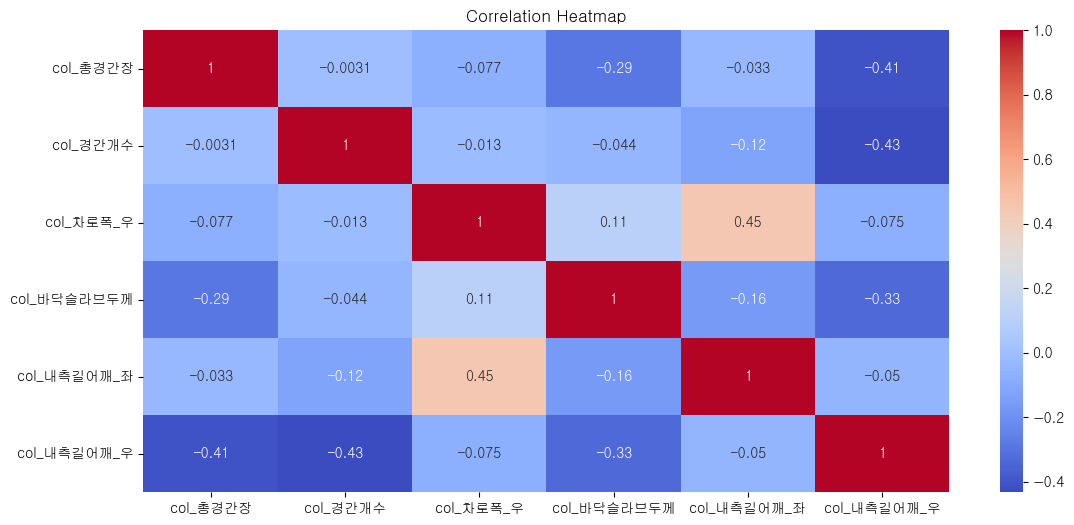

In [38]:
# 시각화
plt.figure(figsize=(13, 6))  # 그래프 크기 설정
sns.heatmap(correlation_df, annot=True, cmap='coolwarm')  # 히트맵 생성
plt.title('Correlation Heatmap')  # 그래프 제목 설정
plt.show()  # 그래프 출력

# 4. 결과(의의)

In [39]:
# 1. '(왼쪽) 내측 길어깨의 폭'은 '(우측) 차로의 폭'과 뚜렷한 양의 상관관계를 나타냄
# 2. '(오른쪽) 내측 길어깨의 폭'이 커질수록 '경간의 총합(총경간장)'과 '경간의 갯수'가 줄어드는 경향을 보임  
# 3. 교량의 '바닥 슬라브 두께'는 '(오른쪽) 내측 길어깨의 폭'과 뚜렷한 음적 상관관계를 보임

# (ㄴ) ML 예측모델 구축 프로젝트의 목표: 
교량데이터를 분석하여 바닥슬라브두께에 영향을 미치는 특성을 선정하고, 기계학습을 통해 나만의 예측 모델을 구축한다. 다만 [ A-a.컬럼명 가공 ~ A-d.전체 데이터의 자료형을 "float"으로 변환] 까지는 프로세스 동일 

# A. 데이터 전처리

## e. 상관관계분석으로 특성 선정

### 1. 상관계수 확인

In [40]:
correlation_df = calsdata_final.corr()

C:\Users\WS\AppData\Local\Temp\ipykernel_9324\923374976.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_df = calsdata_final.corr()


In [41]:
correlation_df

,col_실시설계승인,col_총경간장,col_경간개수,col_1경간,col_2경간,col_3경간,col_4경간,col_5경간,col_6경간,col_7경간,...,col_15경간,col_16경간,col_Unnamed27,col_Unnamed29,col_Unnamed31,col_9교각기둥높이,col_10교각기둥높이,col_11교각기둥높이,col_12교각기둥높이,col_13교각기둥높이
col_실시설계승인,1.000000,0.029750,0.054971,-0.107517,-0.118421,0.021962,-0.096691,-0.168755,-0.069581,0.253785,...,NaN,1.0,-0.056079,-0.110487,-0.000813,NaN,NaN,NaN,NaN,NaN
col_총경간장,0.029750,1.000000,-0.003099,0.514638,0.540977,0.564834,0.526066,0.603197,0.713057,0.776848,...,NaN,1.0,0.026614,0.013544,0.165639,-1.0,NaN,NaN,NaN,NaN
col_경간개수,0.054971,-0.003099,1.000000,0.027946,-0.049751,0.263499,0.163819,0.158961,0.358262,0.387495,...,NaN,1.0,-0.115020,0.055159,0.268544,-1.0,NaN,NaN,NaN,NaN
col_1경간,-0.107517,0.514638,0.027946,1.000000,0.902779,0.860391,0.821157,0.789412,0.796404,0.892513,...,NaN,1.0,0.028930,-0.163693,-0.048277,-1.0,NaN,NaN,NaN,NaN
col_2경간,-0.118421,0.540977,-0.049751,0.902779,1.000000,0.894890,0.938089,0.846437,0.874526,0.769004,...,NaN,1.0,0.284202,-0.189066,-0.210164,-1.0,NaN,NaN,NaN,NaN
col_3경간,0.021962,0.564834,0.263499,0.860391,0.894890,1.000000,0.995468,0.889888,0.783117,0.640396,...,NaN,1.0,-0.174017,-0.221375,-0.297303,-1.0,NaN,NaN,NaN,NaN
col_4경간,-0.096691,0.526066,0.163819,0.821157,0.938089,0.995468,1.000000,0.896505,0.765759,0.668688,...,NaN,1.0,-0.497377,-0.621805,-0.538258,-1.0,NaN,NaN,NaN,NaN
col_5경간,-0.168755,0.603197,0.158961,0.789412,0.846437,0.889888,0.896505,1.000000,0.891279,0.739802,...,NaN,1.0,-0.493760,-0.618201,-0.536708,-1.0,NaN,NaN,NaN,NaN
col_6경간,-0.069581,0.713057,0.358262,0.796404,0.874526,0.783117,0.765759,0.891279,1.000000,0.840308,...,NaN,1.0,-0.526311,-0.800282,-0.884844,-1.0,NaN,NaN,NaN,NaN
col_7경간,0.253785,0.776848,0.387495,0.892513,0.769004,0.640396,0.668688,0.739802,0.840308,1.000000,...,NaN,1.0,0.797970,-0.769012,-0.986309,-1.0,NaN,NaN,NaN,NaN


In [42]:
# 상관관계 계수 비율 선정
correlation_ratio = 0.1

In [43]:
correlation_df.loc[ ( abs(correlation_df.col_바닥슬라브두께) > correlation_ratio )
                   & ( correlation_df.col_바닥슬라브두께 != 1 ), ['col_바닥슬라브두께'] ] # .index

,col_바닥슬라브두께
col_총경간장,-0.292073
col_1경간,-0.677906
col_2경간,-0.249861
col_3경간,-0.107178
col_4경간,0.443183
col_5경간,0.427020
col_6경간,0.365905
col_7경간,0.159564
col_Unnamed19,0.342558
col_Unnamed23,-0.117340


In [44]:
# 정답지 선정
label_column = ['col_바닥슬라브두께']

# 문제지 선정
feature_column = ['col_총경간장', 'col_1경간', 'col_차로폭_우'] # non-null비율이 80% 이상인 컬럼 선정

In [45]:
# 데이터분리 이전에 feature 컬럼의 결측치 제거
calsdata_for_ml = calsdata_final.loc[ (calsdata_final[feature_column[0]].notnull()) 
                                     & (calsdata_final[feature_column[1]].notnull()) 
                                     & (calsdata_final[feature_column[2]].notnull()) ].reset_index(drop=True) 

In [46]:
calsdata_for_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 213 entries, 0 to 212
Data columns (total 85 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   col_설계사        38 non-null     object 
 1   col_프로젝트명      213 non-null    object 
 2   col_연도         38 non-null     object 
 3   col_실시설계승인     120 non-null    float64
 4   col_교량명        213 non-null    object 
 5   col_교량형식       213 non-null    object 
 6   col_축척         211 non-null    object 
 7   col_총경간장       213 non-null    float64
 8   col_경간개수       213 non-null    float64
 9   col_1경간        213 non-null    float64
 10  col_2경간        85 non-null     float64
 11  col_3경간        64 non-null     float64
 12  col_4경간        43 non-null     float64
 13  col_5경간        31 non-null     float64
 14  col_6경간        23 non-null     float64
 15  col_7경간        15 non-null     float64
 16  col_8경간        8 non-null      float64
 17  col_9경간        7 non-null      float64
 18  col_S     

## f. 데이터 분리

In [47]:
calsdata_for_ml.shape # 213,85

(213, 85)

In [48]:
split_ratio = 0.7 # * index 

In [49]:
stdIndex = int( split_ratio * calsdata_for_ml.shape[0] )
stdIndex

149

In [50]:
training_feature = calsdata_for_ml.loc[calsdata_for_ml.index < stdIndex, feature_column]
training_label = calsdata_for_ml.loc[calsdata_for_ml.index < stdIndex, label_column]
test_feature = calsdata_for_ml.loc[calsdata_for_ml.index >= stdIndex, feature_column]
test_label = calsdata_for_ml.loc[calsdata_for_ml.index >= stdIndex, label_column]

# trainingDataFeatures = featuresData.loc[0:stdIndex, features]
# testDataFeatures = featuresData.loc[stdIndex+1:, features]

In [51]:
print(training_feature.shape)
print(training_label.shape)
print(test_feature.shape)
print(test_label.shape)

(149, 3)
(149, 1)
(64, 3)
(64, 1)


# B. 머신러닝모델 선언 및 훈련

## a. ML모델 선언 및 훈련

In [52]:
# 머신러닝 라이브러리
from sklearn import tree
from sklearn import ensemble
from sklearn import svm
from sklearn.linear_model import LinearRegression

In [53]:
# ML모델 선언
tree_model = tree.DecisionTreeRegressor(random_state=5)
ensemble_model = ensemble.RandomForestRegressor(random_state=5)
svm_model = svm.SVR()
linear_model = LinearRegression()

In [54]:
#1
tree_model.fit(X = training_feature,
               y = training_label)

DecisionTreeRegressor(random_state=5)

In [55]:
#2
ensemble_model.fit(X = training_feature,
                   y = training_label)

C:\Users\WS\AppData\Local\Temp\ipykernel_9324\477452324.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  ensemble_model.fit(X = training_feature,


RandomForestRegressor(random_state=5)

In [56]:
#3
svm_model.fit(X = training_feature,
              y = training_label)

C:\Users\WS\AppData\Local\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [57]:
#4
linear_model.fit(X = training_feature,
                 y = training_label)

LinearRegression()

# C. 예측과 검증

## a. 예측 및 데이터 정리

In [58]:
test_label['pred_tree'] = tree_model.predict(X=test_feature)
test_label['pred_ensemble'] = ensemble_model.predict(X=test_feature)
test_label['pred_svm'] = svm_model.predict(X=test_feature)
test_label['pred_linear'] = linear_model.predict(X=test_feature)

In [59]:
test_label = test_label.reset_index(drop=True)
test_label

,col_바닥슬라브두께,pred_tree,pred_ensemble,pred_svm,pred_linear
0,850.0,720.0,716.813187,241.949340,503.848102
1,250.0,240.0,248.300000,240.048357,362.537204
2,250.0,250.0,245.500000,240.202408,361.473782
3,240.0,250.0,243.700000,241.139718,347.994703
4,250.0,240.0,244.500000,241.117399,354.240771
...,...,...,...,...,...
59,800.0,720.0,716.813187,241.949340,503.848102
60,240.0,240.0,241.300000,240.865118,307.102893
61,700.0,720.0,716.813187,241.949340,503.848102
62,800.0,240.0,229.000000,241.303560,388.172330


## b. 결과 검증 

In [60]:
# 모델 정확도 라이브러리 선언
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

In [61]:
# MAE 지표  # print(round(MAE, 2))
MAE_tree = mean_absolute_error(y_true = test_label['col_바닥슬라브두께'], 
                           y_pred = test_label['pred_tree']) 
MAE_ensemble = mean_absolute_error(y_true = test_label['col_바닥슬라브두께'], 
                           y_pred = test_label['pred_ensemble']) 
MAE_svm = mean_absolute_error(y_true = test_label['col_바닥슬라브두께'], 
                           y_pred = test_label['pred_svm']) 
MAE_linear = mean_absolute_error(y_true = test_label['col_바닥슬라브두께'], 
                           y_pred = test_label['pred_linear'])

MAE_table = pd.DataFrame([[MAE_tree, MAE_ensemble, MAE_svm, MAE_linear]], columns=['MAE_tree', 'MAE_ensemble', 'MAE_svm', 'MAE_linear'] )
MAE_table

,MAE_tree,MAE_ensemble,MAE_svm,MAE_linear
0,37.34375,39.319946,137.396114,133.006469


In [62]:
# RMSE 지표
RMSE_tree  = np.sqrt(mean_squared_error(y_true = test_label['col_바닥슬라브두께'], 
                                        y_pred = test_label['pred_tree']) )
RMSE_ensemble = np.sqrt(mean_squared_error(y_true = test_label['col_바닥슬라브두께'], 
                                           y_pred = test_label['pred_ensemble']) )
RMSE_svm = np.sqrt(mean_squared_error(y_true = test_label['col_바닥슬라브두께'], 
                                      y_pred = test_label['pred_svm']) )
RMSE_linear = np.sqrt(mean_squared_error(y_true = test_label['col_바닥슬라브두께'], 
                                         y_pred = test_label['pred_linear']) )


RMSE_table = pd.DataFrame([[RMSE_tree, RMSE_ensemble, RMSE_svm, RMSE_linear]], columns=['RMSE_tree', 'RMSE_ensemble', 'RMSE_svm', 'RMSE_linear'] )
RMSE_table

,RMSE_tree,RMSE_ensemble,RMSE_svm,RMSE_linear
0,92.254742,92.75971,273.062145,172.019367


In [63]:
# 정확도분석결과 : Tree, Ensemble 모델의 정확도가 나머지 모델보다 월등히 높음 

# 모델덩어리 저장

In [64]:
## pickle을 통해 ML모델 저장
import pickle
with open("./bridge_tree_model.pickle","wb") as fw:
    pickle.dump(tree_model,fw)

# 모델 시각화

[Text(0.4381302862719584, 0.9705882352941176, 'x[1] <= 18765.5\nsquared_error = 36321.81\nsamples = 149\nvalue = 322.779'),
 Text(0.1873780091086532, 0.9117647058823529, 'x[1] <= 15250.0\nsquared_error = 34674.826\nsamples = 24\nvalue = 717.917'),
 Text(0.16655823031880287, 0.8529411764705882, 'x[1] <= 11666.5\nsquared_error = 29559.168\nsamples = 23\nvalue = 701.304'),
 Text(0.062459336369551074, 0.7941176470588235, 'x[1] <= 8000.0\nsquared_error = 16556.0\nsamples = 10\nvalue = 628.0'),
 Text(0.04163955757970072, 0.7352941176470589, 'squared_error = 0.0\nsamples = 1\nvalue = 450.0'),
 Text(0.08327911515940144, 0.7352941176470589, 'x[1] <= 10500.0\nsquared_error = 14483.951\nsamples = 9\nvalue = 647.778'),
 Text(0.04163955757970072, 0.6764705882352942, 'x[2] <= 3375.0\nsquared_error = 5600.0\nsamples = 5\nvalue = 720.0'),
 Text(0.02081977878985036, 0.6176470588235294, 'squared_error = 0.0\nsamples = 1\nvalue = 800.0'),
 Text(0.062459336369551074, 0.6176470588235294, 'squared_error = 5

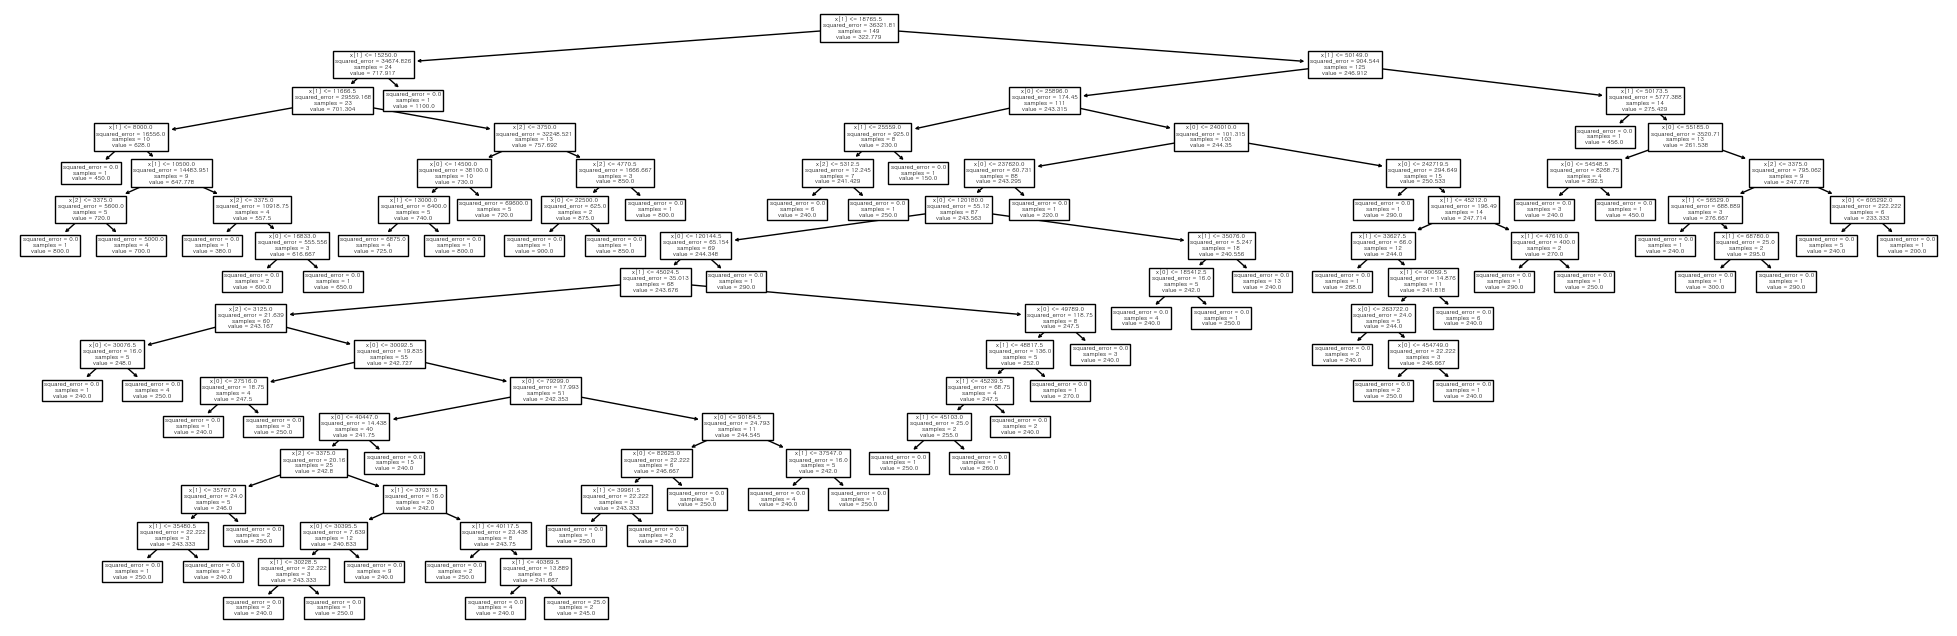

In [65]:
# tree 모델 시각화
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(25,8))
plot_tree(tree_model)